In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\

# Data Wrangling

In [2]:
df_heart = pd.read_csv('heartdisease.csv')

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df_heart.shape

(303, 14)

In [5]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
#mengubah target class penyakit jantung 0 = tidak 1 = ya
df_heart['target']= df_heart.target.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [7]:
# mengubah kolom jenis_kelamin 0 = perempuan, 1 = laki-laki
df_heart['sex']= df_heart.sex.map({0:'female', 1:'male'})

In [8]:
df_heart['ca'] = df_heart.ca.fillna(df_heart.ca.mean())

In [9]:
# code 1 (mengisi kolom kosong dengan nilai mean)
df_heart['thal']=df_heart.thal.fillna(df_heart.thal.mean())

# code 2 (mengisi kolom kosong dengan nilai mean) --> code 1 dan 2 hanya beda cara penulisan saja.
#df_heart['thal']=df_heart.fillna(df_heart['thal'].mean())

In [10]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 33.3+ KB


In [11]:
df_heart.corr()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.223120
cp,0.104139,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.414446
trestbps,0.284946,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.150825
chol,0.208950,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.085164
fbs,0.118530,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.025264
restecg,0.148868,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.169202
thalach,-0.393806,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.417167
exang,0.091661,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.431894
oldpeak,0.203805,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.424510
slope,0.161770,0.152050,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.109618,0.339213


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

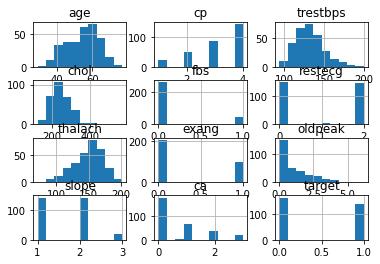

In [12]:
df_heart.hist()

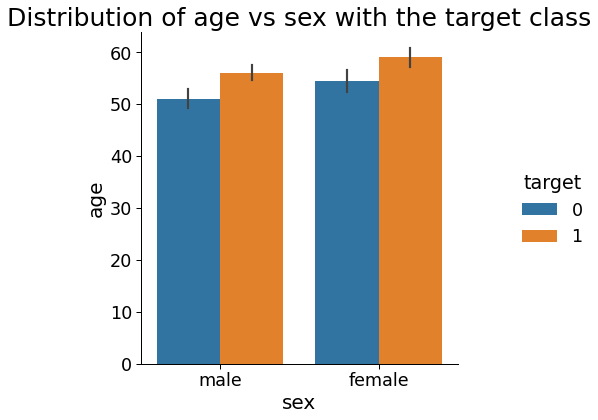

In [14]:
# persebaran distribusi umur vs jenis kelamin pada class target
sns.catplot(kind = 'bar', data = df_heart, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [15]:
df_heart['sex'] = df_heart.sex.map({'female': 0, 'male': 1})

#  Data Preprocessing

In [16]:
features = df_heart.drop('target', axis=1).values

In [17]:
target = df_heart['target'].values

In [18]:
target = to_categorical(target)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.20, random_state=2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

In [21]:
n_cols = features.shape[1]

# Model 1

In [22]:
# define model
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2, activation='softmax'))

# Compile Model

In [23]:
# compile model
model.compile(optimizer= "adam",loss = "categorical_crossentropy",metrics=["accuracy"])

# Train Model

In [24]:
# train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150)

Train on 242 samples, validate on 61 samples
Epoch 1/150
242/242 [==============================] - 2s 10ms/step - loss: 6.1289 - acc: 0.4669 - val_loss: 5.1580 - val_acc: 0.5574
Epoch 2/150
242/242 [==============================] - 0s 74us/step - loss: 5.8759 - acc: 0.4959 - val_loss: 5.0215 - val_acc: 0.5902
Epoch 3/150
242/242 [==============================] - 0s 87us/step - loss: 5.5958 - acc: 0.5207 - val_loss: 4.6401 - val_acc: 0.5574
Epoch 4/150
242/242 [==============================] - 0s 91us/step - loss: 5.2007 - acc: 0.5248 - val_loss: 4.3347 - val_acc: 0.5902
Epoch 5/150
242/242 [==============================] - 0s 99us/step - loss: 4.3135 - acc: 0.5289 - val_loss: 3.5271 - val_acc: 0.6066
Epoch 6/150
242/242 [==============================] - 0s 87us/step - loss: 3.5000 - acc: 0.5372 - val_loss: 2.7800 - val_acc: 0.6557
Epoch 7/150
242/242 [==============================] - 0s 111us/step - loss: 2.7766 - acc: 0.5620 - val_loss: 2.1466 - val_acc: 0.7213
Epoch 8/150
242/

242/242 [==============================] - 0s 115us/step - loss: 0.7048 - acc: 0.6736 - val_loss: 0.5123 - val_acc: 0.7213
Epoch 62/150
242/242 [==============================] - 0s 95us/step - loss: 0.5518 - acc: 0.7066 - val_loss: 0.4461 - val_acc: 0.7705
Epoch 63/150
242/242 [==============================] - 0s 132us/step - loss: 0.4567 - acc: 0.8017 - val_loss: 0.4971 - val_acc: 0.7377
Epoch 64/150
242/242 [==============================] - 0s 136us/step - loss: 0.4911 - acc: 0.7479 - val_loss: 0.5824 - val_acc: 0.7541
Epoch 65/150
242/242 [==============================] - 0s 173us/step - loss: 0.5712 - acc: 0.7355 - val_loss: 0.4622 - val_acc: 0.7705
Epoch 66/150
242/242 [==============================] - 0s 144us/step - loss: 0.4628 - acc: 0.7727 - val_loss: 0.7911 - val_acc: 0.7049
Epoch 67/150
242/242 [==============================] - 0s 115us/step - loss: 0.5386 - acc: 0.7686 - val_loss: 0.4719 - val_acc: 0.8033
Epoch 68/150
242/242 [==============================] - 0s 78u

242/242 [==============================] - 0s 87us/step - loss: 0.3922 - acc: 0.8223 - val_loss: 0.4642 - val_acc: 0.7705
Epoch 122/150
242/242 [==============================] - 0s 80us/step - loss: 0.3768 - acc: 0.8264 - val_loss: 0.5950 - val_acc: 0.7213
Epoch 123/150
242/242 [==============================] - 0s 161us/step - loss: 0.4206 - acc: 0.8017 - val_loss: 0.4588 - val_acc: 0.7705
Epoch 124/150
242/242 [==============================] - 0s 70us/step - loss: 0.3903 - acc: 0.8058 - val_loss: 0.5837 - val_acc: 0.7377
Epoch 125/150
242/242 [==============================] - 0s 74us/step - loss: 0.4506 - acc: 0.7934 - val_loss: 0.5056 - val_acc: 0.7705
Epoch 126/150
242/242 [==============================] - 0s 75us/step - loss: 0.3985 - acc: 0.8347 - val_loss: 0.4859 - val_acc: 0.7869
Epoch 127/150
242/242 [==============================] - 0s 82us/step - loss: 0.3841 - acc: 0.8306 - val_loss: 0.4537 - val_acc: 0.7705
Epoch 128/150
242/242 [==============================] - 0s 7

In [25]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.814, Valid: 0.787


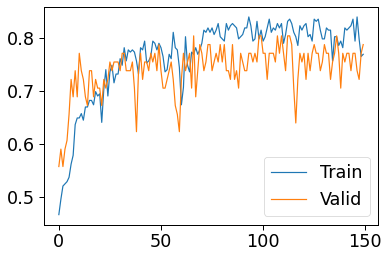

In [26]:
# plot training history
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Valid')
plt.legend()
plt.show()

# Model 1.2

In [54]:
# define model
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2, activation='softmax'))

In [55]:
# compile model
model.compile(optimizer= "adam",loss = "categorical_crossentropy",metrics=["accuracy"])

In [56]:
# train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150)

Train on 242 samples, validate on 61 samples
Epoch 1/150
242/242 [==============================] - 0s 2ms/step - loss: 4.7210 - acc: 0.4132 - val_loss: 4.5924 - val_acc: 0.3770
Epoch 2/150
242/242 [==============================] - 0s 87us/step - loss: 4.1551 - acc: 0.3967 - val_loss: 4.3512 - val_acc: 0.3770
Epoch 3/150
242/242 [==============================] - 0s 91us/step - loss: 3.8522 - acc: 0.4298 - val_loss: 3.7777 - val_acc: 0.4590
Epoch 4/150
242/242 [==============================] - 0s 140us/step - loss: 3.3261 - acc: 0.4380 - val_loss: 4.0819 - val_acc: 0.3279
Epoch 5/150
242/242 [==============================] - 0s 105us/step - loss: 3.1521 - acc: 0.4174 - val_loss: 3.1605 - val_acc: 0.4754
Epoch 6/150
242/242 [==============================] - 0s 124us/step - loss: 2.6071 - acc: 0.4917 - val_loss: 2.9639 - val_acc: 0.3934
Epoch 7/150
242/242 [==============================] - 0s 95us/step - loss: 2.2704 - acc: 0.4959 - val_loss: 2.5226 - val_acc: 0.4754
Epoch 8/150
242

Epoch 61/150
242/242 [==============================] - 0s 91us/step - loss: 0.3957 - acc: 0.8223 - val_loss: 0.5032 - val_acc: 0.7705
Epoch 62/150
242/242 [==============================] - 0s 74us/step - loss: 0.3907 - acc: 0.8223 - val_loss: 0.4793 - val_acc: 0.7541
Epoch 63/150
242/242 [==============================] - 0s 91us/step - loss: 0.3962 - acc: 0.8223 - val_loss: 0.4739 - val_acc: 0.8197
Epoch 64/150
242/242 [==============================] - 0s 82us/step - loss: 0.4237 - acc: 0.8182 - val_loss: 0.4647 - val_acc: 0.7869
Epoch 65/150
242/242 [==============================] - 0s 82us/step - loss: 0.4030 - acc: 0.8388 - val_loss: 0.4612 - val_acc: 0.7705
Epoch 66/150
242/242 [==============================] - 0s 82us/step - loss: 0.4125 - acc: 0.8140 - val_loss: 0.4687 - val_acc: 0.7541
Epoch 67/150
242/242 [==============================] - 0s 87us/step - loss: 0.4081 - acc: 0.8099 - val_loss: 0.7339 - val_acc: 0.6721
Epoch 68/150
242/242 [==============================] -

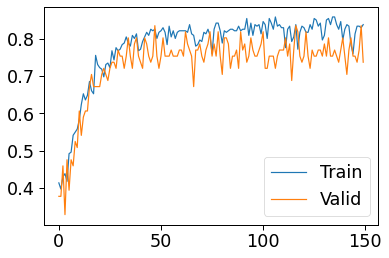

In [57]:
# plot training history
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Valid')
plt.legend()
plt.show()